# Esercizio 8

## Esercizio 8.1

Per calcolare il valore medio dell'energia ho usato 100 blocchi da 2+000 passi dopo aver fatto equilibrare il sistema con 40000 passi

-0.0836846


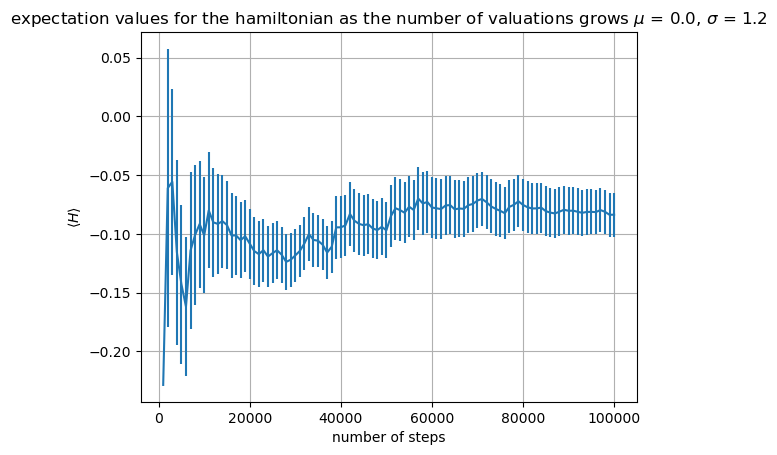

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

nblk, nstep, d, delta_SA, SA_nstep, nstep_equilibrium, mu, sigma, T_min, T_max, n_temp = np.loadtxt("./input.txt")

H_values = np.loadtxt("./H_mean.txt")

x = np.arange(nblk+1)
x = x*nstep

plt.errorbar(x[1:], H_values[:,1], yerr = H_values[:,2])

print(H_values[-1,1])
plt.xlabel('number of steps')
plt.ylabel(r'$\langle H \rangle$')
plt.title("expectation values for the hamiltonian as the number of valuations grows " + r"$\mu$ = " + str(mu) + r", $\sigma$ = " + str(sigma))
plt.grid(True)

plt.show()

Per capire quanto fare lunghi i blocchi ho fatto un grafico della deviazione standard della media al variare della lunghezza dei blocchi.

In [13]:
"""
import math
H_prova = np.loadtxt("./prova.txt")
n = 10000
L = np.zeros(n)

tmax = len(H_prova)

for i in range(n):
    L[i] = 10 + i*10

    
StDevMean = np.zeros( n )

sum1 = 0
ave = 0
ave2 = 0
for i in range( n ):
    if i%10 == 0:
        print(i)
    nblk = int(tmax/L[i])
    #print(nblk)
    
    ave = 0
    ave2 = 0
        
    for j in range( int(nblk) ):
        
        sum1 = 0
        
        for k in range( int(L[i]) ):
                
            sum1 += H_prova[j*int(L[i]) + k]
            
        sum1 = sum1/L[i]
        ave += sum1
        ave2 += sum1**2
    
    ave = ave/nblk
    ave2 = ave2/nblk            
    StDevMean[i] = math.sqrt( (ave2 - ave**2)/nblk )

plt.plot(L[:], StDevMean[:])

plt.xlabel('block length')
plt.ylabel(r'$\sigma_{mean}$')    
plt.grid(True)
    
plt.show()
"""

'\nimport math\nH_prova = np.loadtxt("./prova.txt")\nn = 10000\nL = np.zeros(n)\n\ntmax = len(H_prova)\n\nfor i in range(n):\n    L[i] = 10 + i*10\n\n    \nStDevMean = np.zeros( n )\n\nsum1 = 0\nave = 0\nave2 = 0\nfor i in range( n ):\n    if i%10 == 0:\n        print(i)\n    nblk = int(tmax/L[i])\n    #print(nblk)\n    \n    ave = 0\n    ave2 = 0\n        \n    for j in range( int(nblk) ):\n        \n        sum1 = 0\n        \n        for k in range( int(L[i]) ):\n                \n            sum1 += H_prova[j*int(L[i]) + k]\n            \n        sum1 = sum1/L[i]\n        ave += sum1\n        ave2 += sum1**2\n    \n    ave = ave/nblk\n    ave2 = ave2/nblk            \n    StDevMean[i] = math.sqrt( (ave2 - ave**2)/nblk )\n\nplt.plot(L[:], StDevMean[:])\n\nplt.xlabel(\'block length\')\nplt.ylabel(r\'$\\sigma_{mean}$\')    \nplt.grid(True)\n    \nplt.show()\n'

## Esercizio 8.2

Per il simulatted annealing ho usato 1000 temperature diverse iniziali e finali comprese tra T_max = 0.1 e T_min = 0.001. Per ogni temperatura ho usato 100 passi per l'algoritmo di Metropolis dedicato al simulated annealing, cioè per ogni temperatura il programma calcolava 100 volte l'integrale con diversi parametri $\mu$ e $\sigma$ campionati secondo la densità di probabilità $e^{{-\langle E\rangle}/{T}}$ dove $\langle E \rangle$ è il valore medio dell'energia. Ogni volta che venivano cambiati i parametri ho usato una funzione per ricalibrare il passo dell'algoritmo di Metropolis per il calcolo del valore medio dell'energia in modo che l'accettazione fosse del 50%. Inoltre, dal grafico dei valori medi dell'energia del ground state trovato alla fine dell'esercizio, ho notato che dopo 40000 passi questi si stabilizzavano quindi per ogni calcolo del valore medio di E ho usato 40000 passi per l'equilibrazione. Come passo per il campionamento dei parametri al variare della temperatura ho usato un passo variabile che diminuiva con la temperatura in modo da avere per quanto possibile un'accettazione del 50% anche per il simulated annealing.

Nel grafico seguente ho riportato i valori medi di $\langle E \rangle$ calcolati sui 100 valori trovati nei 100 passi per ogni temperatura. Avendo usato 1000 temperature diverse, sono riportati 1000 valori.

-0.419377


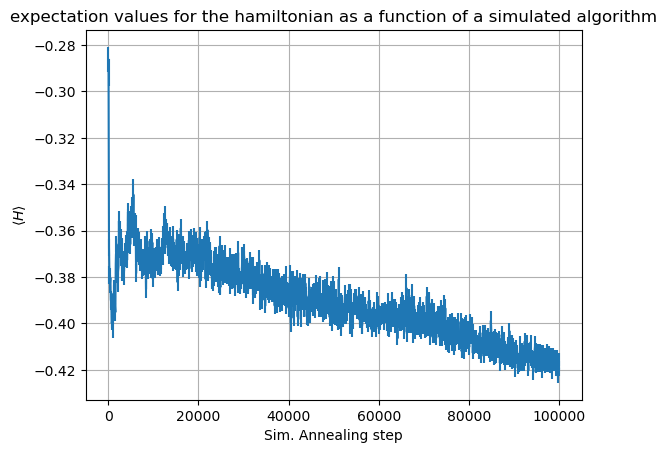

In [19]:
SA_H = np.loadtxt("./SA_H.txt")

#x = np.arange( n_temp )
x = np.arange( n_temp )

plt.errorbar(x[:]*SA_nstep, SA_H[:,4], yerr = SA_H[:,5])

plt.xlabel('Sim. Annealing step')
plt.ylabel(r'$\langle H \rangle$')
plt.title("expectation values for the hamiltonian as a function of a simulated algorithm")
plt.grid(True)
print(SA_H[-1,4])
plt.show()

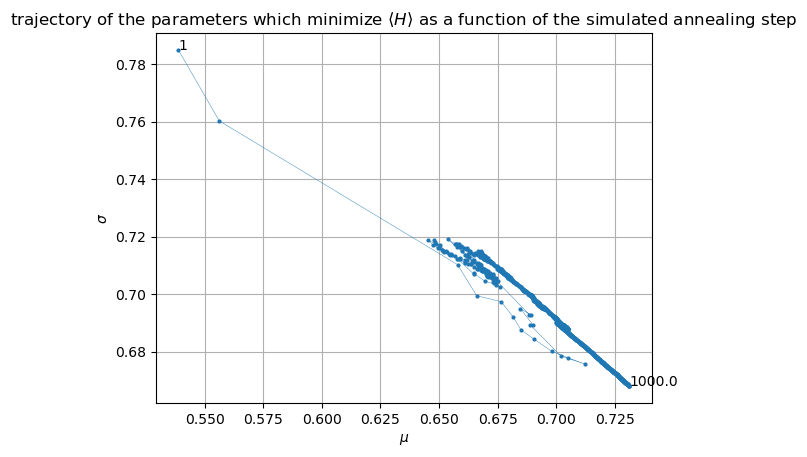

In [15]:
plt.plot(SA_H[:,2], SA_H[:,3], '-o', markersize = 2, linewidth=0.3)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title(r"trajectory of the parameters which minimize $\langle H \rangle$ as a function of the simulated annealing step")
plt.grid(True)
plt.text(SA_H[0, 2], SA_H[0, 3], str(1))
plt.text(SA_H[-1, 2], SA_H[-1, 3], str(n_temp))

plt.show()

Nel seguente grafico ho riportato i valori medi dell'energia con le relative incertezze calcolati con i parametri $\mu$ e $\sigma$ trovati con il simulated annealing che minimizzano E. Per questo grafico è stata usata la media a blocchi.

-0.444256


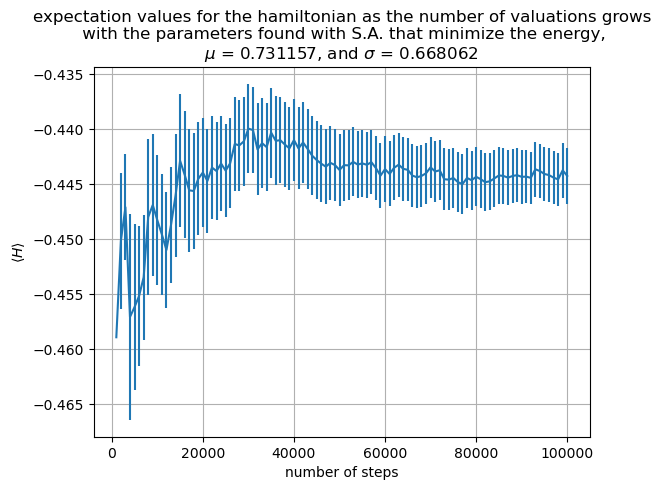

In [16]:
H_min = np.loadtxt("./H_min.txt")

mu_min = SA_H[-1, 2]
sigma_min = SA_H[-1, 3]
x = np.arange(nblk+1)
x = x*nstep

plt.errorbar(x[1:], H_min[:,1], yerr = H_min[:,2])

print(H_min[-1,1])
plt.xlabel('number of steps')
plt.ylabel(r'$\langle H \rangle$')
plt.title("expectation values for the hamiltonian as the number of valuations grows\n with the parameters found with S.A. that minimize the energy,\n" + "$\mu$ = " + str(mu_min) + ", and $\sigma$ = " + str(sigma_min))
plt.grid(True)

plt.show()

N_throws =  100000
Ground state energy:  -0.460465879692715


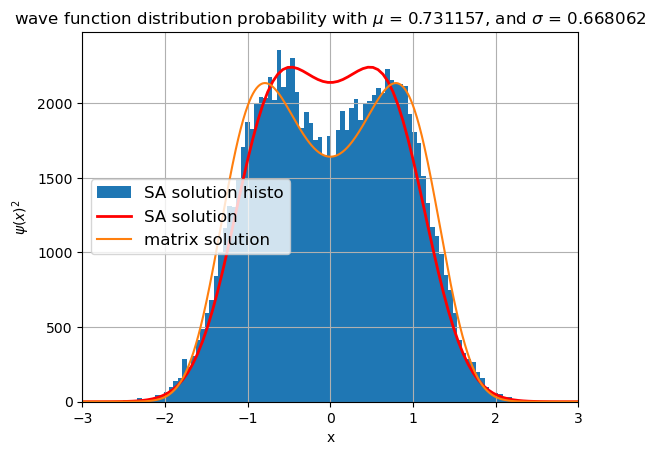

In [34]:
nbins = 100

histo_psi = np.loadtxt("./isto_psi_min.txt")
N_throws = len(histo_psi)
print("N_throws = ", N_throws)

x_max = max(histo_psi[:])
x_min = min(histo_psi[:])
#print(x_max)
#print(x_min)

bin_size = (x_max - x_min) / nbins

plt.hist(histo_psi[:], bins=int(nbins), label='SA solution histo')
plt.xlabel('x')
plt.ylabel(r'$\psi(x)^2$')

x = np.linspace(-3, 3, 100)
a = ((x-mu_min)/sigma_min)**2
b = ((x+mu_min)/sigma_min)**2
psi = np.exp(-a/2)+np.exp(-b/2)
psi_squared = psi**2
c = (mu_min/sigma_min)**2
Normalization = 1/(2*sigma_min*(1+np.exp(-c))*math.sqrt(math.pi))
plt.plot(x, psi_squared*Normalization*bin_size*N_throws, 'r-', lw=2, label='SA solution')

#----------------------------------------- matrix solution ----------------------------------------------
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

plt.plot(x,((psi[0])**2)*bin_size*N_throws, label='matrix solution')
plt.xlim((-3,3))

plt.legend(fontsize='large')
plt.grid(True)
plt.title( r"wave function distribution probability with $\mu$ = " + str(mu_min) + r", and $\sigma$ = " + str(sigma_min) )
plt.show()